In [23]:
%pylab inline

import pandas as pd
import random

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Load

In [24]:
df = pd.read_csv('./getstat_com_serp_report_201707.csv', parse_dates=['Crawl Date'], na_values={'Location': ['']})

In [25]:
df[:5]

,Keyword,Market,Location,Device,Crawl Date,Rank,URL
0,search analytics,US-en,NaN,desktop,2017-07-01,1,support.google.com/webmasters/answer/6155685?h...
1,search analytics,US-en,NaN,desktop,2017-07-01,2,trends.google.com/
2,search analytics,US-en,NaN,desktop,2017-07-01,3,developers.google.com/webmaster-tools/search-c...
3,search analytics,US-en,NaN,desktop,2017-07-01,4,en.wikipedia.org/wiki/Search_analytics
4,search analytics,US-en,NaN,desktop,2017-07-01,5,searchengineland.com/google-officially-launche...


Location might be empty

In [26]:
df['Rank'].size

9901038

## Take a first look

track first 100 ranks for every keyword in one segment

In [27]:
df.groupby(['Crawl Date', 'Keyword', 'Market', 'Device']).size()[:20]

Crawl Date  Keyword                        Market  Device 
2017-07-01  "analytics seo"                GB-en   desktop     99
                                           US-en   desktop    100
            "not provided" google          GB-en   desktop    101
                                           US-en   desktop    101
            (not provided)                 GB-en   desktop    101
                                           US-en   desktop    101
            360 seo                        GB-en   desktop    100
                                           US-en   desktop    100
            360i conference                GB-en   desktop    100
                                           US-en   desktop    100
            360i contact                   GB-en   desktop    100
                                           US-en   desktop    100
            360i digital                   GB-en   desktop    100
                                           US-en   desktop     97
            360i 

sample of keywords and their URL in the first rank

In [28]:
df[(df['Crawl Date'] == '2017-07-01') & (df['Rank'] == 1)][:10]

,Keyword,Market,Location,Device,Crawl Date,Rank,URL
0,search analytics,US-en,NaN,desktop,2017-07-01,1,support.google.com/webmasters/answer/6155685?h...
101,google serp tracking,US-en,NaN,desktop,2017-07-01,1,serps.com/tools/rank-checker/
201,seo stats,US-en,NaN,desktop,2017-07-01,1,www.searchenginejournal.com/24-eye-popping-seo...
302,analytics search,US-en,NaN,desktop,2017-07-01,1,support.google.com/webmasters/answer/6155685?h...
405,serp tracking,US-en,NaN,desktop,2017-07-01,1,www.rankscanner.com/about/
505,seo rank tracker,US-en,NaN,desktop,2017-07-01,1,www.link-assistant.com/rank-tracker/
605,seo tracker,US-en,NaN,desktop,2017-07-01,1,www.seopowersuite.com/rank-tracker/
705,bing and yahoo,US-en,NaN,desktop,2017-07-01,1,searchengineland.com/yahoo-bing-renegotiate-se...
806,analytics seo,US-en,NaN,desktop,2017-07-01,1,www.authoritas.com/
906,rank tracker seo,US-en,NaN,desktop,2017-07-01,1,www.link-assistant.com/rank-tracker/


one keyword and the URL in the first rank in all segments

In [29]:
df[(df['Crawl Date'] == '2017-07-01') & (df['Keyword'] == 'seo intent') & (df['Rank'] == 1)]

,Keyword,Market,Location,Device,Crawl Date,Rank,URL
314519,seo intent,CA-en,NaN,desktop,2017-07-01,1,www.searchenginejournal.com/user-intent-future...
315420,seo intent,CA-en,NaN,smartphone,2017-07-01,1,www.searchenginejournal.com/user-intent-future...
316322,seo intent,US-en,NaN,desktop,2017-07-01,1,www.searchenginejournal.com/user-intent-future...
317227,seo intent,US-en,NaN,smartphone,2017-07-01,1,www.searchenginejournal.com/user-intent-future...
318129,seo intent,GB-en,NaN,desktop,2017-07-01,1,www.searchenginejournal.com/user-intent-future...
319031,seo intent,GB-en,NaN,smartphone,2017-07-01,1,www.searchenginejournal.com/user-intent-future...


## Multi-Dimensional Distribution

### curse of dimensionality

the exponential equation of multi-dimensional data (density = 1.0):

    number of rows = card(dim 1) * .. * card(dim N)
        ~= C * card(dim factored)**N
        
    example: 2,000 * 4,000 * 6,000 = 6 * 2,000**3
    
for one keyword track the top 100 urls in all segments

    number rows per day = card(keywords) * card(segment 1) .. * card(segment N) * card(ranks)
    
    2 keywords * 2 markets * 2 devices * 100 ranks = 800 rows per day
    1,000 keywords * 3 markets * 2 devices * 100 ranks = 600,000
    
do this over time

    number rows = card(days) * card(keywords) * card(segment 1) .. * card(segment N) * card(ranks)
    
    30 days * 2 keywords * 2 markets * 2 devices * 100 ranks = 24,000 rows
    30 days * 1,000 keywords * 3 markets * 2 devices * 100 ranks = 18,000,000

are there 600,000 rows per day?

In [30]:
N_DAYS = 4
first_days = df['Crawl Date'] < df['Crawl Date'].unique()[N_DAYS]

In [31]:
# df.groupby('Crawl Date')['Crawl Date'].count()
df[first_days].groupby('Crawl Date').size()

Crawl Date
2017-07-01    319534
2017-07-02    319426
2017-07-03    319452
2017-07-04    319395
dtype: int64

only get 300,000 rows per day

    density = 0.53
    sparsity = 0.47

and over the time of 31 days it stays around 319,000 per day

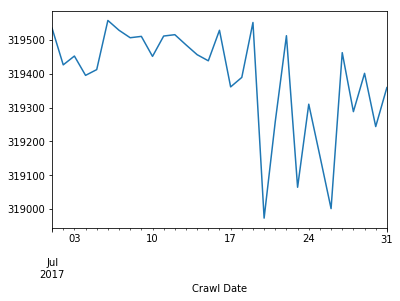

In [32]:
df.groupby('Crawl Date').size().plot()

### investigate distribution

#### has every segement same number of keywords?

In [33]:
df[first_days].groupby(['Crawl Date', 'Market', 'Device'])['Keyword'].nunique()

Crawl Date  Market  Device    
2017-07-01  CA-en   desktop        142
                    smartphone     144
            GB-en   desktop       1258
                    smartphone     157
            US-en   desktop       1284
                    smartphone     197
2017-07-02  CA-en   desktop        142
                    smartphone     144
            GB-en   desktop       1258
                    smartphone     157
            US-en   desktop       1284
                    smartphone     197
2017-07-03  CA-en   desktop        142
                    smartphone     144
            GB-en   desktop       1258
                    smartphone     157
            US-en   desktop       1284
                    smartphone     197
2017-07-04  CA-en   desktop        142
                    smartphone     144
            GB-en   desktop       1258
                    smartphone     157
            US-en   desktop       1284
                    smartphone     197
Name: Keyword, dtype: int64

number of tracked keywords per segment is very different

it explains why there are only 310,000 rows per day:

    1250 keywords * 2 markets * 1 device * 100 ranks = 250,000
    150 keywords * 4 (markets, devices) * 100 ranks = 60,000
    
    = 310,000 rows per day

#### are there always 100 ranks per keyword?

the keyword counts from above should increase by a factor of 100

In [34]:
df[first_days].groupby(['Crawl Date', 'Market', 'Device']).size()

Crawl Date  Market  Device    
2017-07-01  CA-en   desktop        14287
                    smartphone     14532
            GB-en   desktop       126246
                    smartphone     15726
            US-en   desktop       128852
                    smartphone     19891
2017-07-02  CA-en   desktop        14285
                    smartphone     14526
            GB-en   desktop       126111
                    smartphone     15811
            US-en   desktop       128800
                    smartphone     19893
2017-07-03  CA-en   desktop        14288
                    smartphone     14535
            GB-en   desktop       126217
                    smartphone     15830
            US-en   desktop       128700
                    smartphone     19882
2017-07-04  CA-en   desktop        14281
                    smartphone     14518
            GB-en   desktop       126185
                    smartphone     15828
            US-en   desktop       128696
                    smartp

#### keywords and urls

* less urls than keywords: some urls rank for more than 1 keyword
* less keywords than urls: different segments of a keyword have different urls for one rank

In [35]:
df[(df['Crawl Date'] <= '2017-07-02') & (df['Rank'] >= 5) & (df['Rank'] <= 10)] \
  .groupby(['Crawl Date', 'Rank'])['Keyword', 'URL'] \
  .nunique()

Keyword   URL
Crawl Date Rank               
2017-07-01 5        1290  1247
           6        1290  1357
           7        1290  1454
           8        1290  1532
           9        1290  1581
           10       1290  1592
2017-07-02 5        1290  1237
           6        1290  1366
           7        1290  1478
           8        1290  1509
           9        1290  1568
           10       1290  1602

#### how many unique URLs per day, per day and segment permutation?

In [36]:
df[(df['Crawl Date'] <= '2017-07-06')] \
  .groupby(['Crawl Date'])['URL'] \
  .nunique()

Crawl Date
2017-07-01    63822
2017-07-02    64870
2017-07-03    65100
2017-07-04    65029
2017-07-05    64811
2017-07-06    63971
Name: URL, dtype: int64

In [37]:
df[(df['Crawl Date'] <= '2017-07-03')] \
  .groupby(['Crawl Date', 'Market'])['URL'] \
  .nunique()

Crawl Date  Market
2017-07-01  CA-en     12444
            GB-en     47874
            US-en     48291
2017-07-02  CA-en     12526
            GB-en     48246
            US-en     48603
2017-07-03  CA-en     12532
            GB-en     48281
            US-en     48542
Name: URL, dtype: int64

In [38]:
df[(df['Crawl Date'] <= '2017-07-03')] \
  .groupby(['Crawl Date', 'Market', 'Device'])['URL'] \
  .nunique()

Crawl Date  Market  Device    
2017-07-01  CA-en   desktop        9295
                    smartphone     9608
            GB-en   desktop       44924
                    smartphone    10408
            US-en   desktop       45069
                    smartphone    11620
2017-07-02  CA-en   desktop        9333
                    smartphone     9580
            GB-en   desktop       45166
                    smartphone    10415
            US-en   desktop       45187
                    smartphone    11662
2017-07-03  CA-en   desktop        9325
                    smartphone     9669
            GB-en   desktop       45203
                    smartphone    10391
            US-en   desktop       45189
                    smartphone    11709
Name: URL, dtype: int64

### anomaly detection

are the above numbers consistent over time?

plot each segment with number of keywords over time

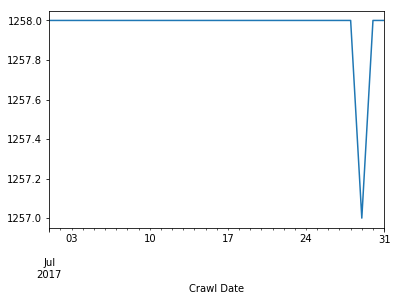

In [39]:
df.query('Market == "GB-en" and Device == "desktop"')\
  .groupby(['Crawl Date'])['Keyword']\
  .nunique()\
  .plot()

## 1-Dimensional Distribution (columns)

### Crawl Date

should have data for every day

the "Crawl Date" column has only valid dates of July 2017

should have 31 unique dates

In [40]:
# df.groupby('Crawl Date')['Crawl Date'].count()
df['Crawl Date'].nunique()

31

In [41]:
df['Crawl Date'].unique()[:4]

array(['2017-07-01T00:00:00.000000000', '2017-07-02T00:00:00.000000000',
       '2017-07-03T00:00:00.000000000', '2017-07-04T00:00:00.000000000'], dtype='datetime64[ns]')

### Rank

In [42]:
df['Rank'].nunique()

107

#### similar number of rows for every rank?

first peek looks promising

In [43]:
df.query('Rank < 5').groupby('Rank').size()

Rank
1    98797
2    98761
3    99084
4    99029
dtype: int64

plot a histogram to see the distribution

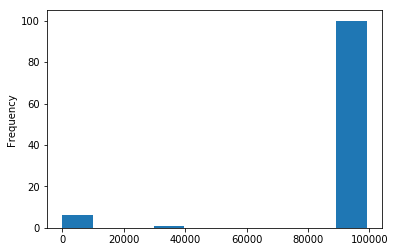

In [44]:
df.groupby('Rank').size().plot.hist()

which ranks deviate?

plot number of rows over rank

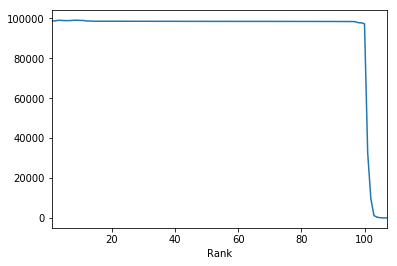

In [45]:
df.groupby('Rank').size().plot()

must be ranks > 100

In [46]:
df.query('Rank > 95').groupby('Rank').size()

Rank
96     98451
97     98410
98     97897
99     97802
100    97294
101    32830
102     9679
103     1156
104      350
105      102
106        2
107        1
dtype: int64

#### are the data evenly distributed over the ranks

take a sample first

In [47]:
df[(df['Crawl Date'] < '2017-07-04') & (df['Rank'] < 5)].groupby(['Crawl Date', 'Rank']).size()

Crawl Date  Rank
2017-07-01  1       3188
            2       3193
            3       3193
            4       3192
2017-07-02  1       3221
            2       3191
            3       3184
            4       3188
2017-07-03  1       3184
            2       3182
            3       3186
            4       3193
dtype: int64

    30 days * 100 ranks = 3000 datapoints
    
almost all of them have a value of 3,000

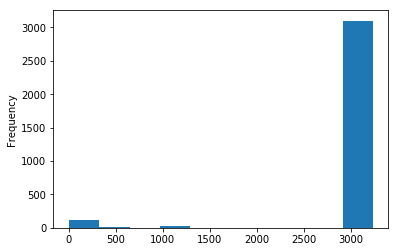

In [48]:
df.groupby(['Crawl Date', 'Rank']).size().plot.hist()

### Device

In [49]:
df['Device'].nunique()

2

In [50]:
# df.groupby('Device')['Device'].count()
df.groupby('Device').size()

Device
desktop       8345839
smartphone    1555199
dtype: int64

there is less data for the device "smartphone"

### Keyword

track fixed number of keywords over 1 month

In [51]:
df['Keyword'].nunique()

1290

keywords with

    200 = 2 * 100 ranks
    
are only tracked in two of the six segments

In [52]:
df.groupby(['Crawl Date', 'Keyword']).size()[:20]

Crawl Date  Keyword                      
2017-07-01  "analytics seo"                  199
            "not provided" google            202
            (not provided)                   202
            360 seo                          200
            360i conference                  200
            360i contact                     200
            360i digital                     197
            360i digital agency              197
            360i digital marketing           197
            360i digital marketing agency    197
            360i news                        200
            360i search marketing            200
            [secure search]                  201
            accurate rank tracker            200
            accurate rank tracking           200
            accurate seo rank tracking       200
            advanced rank tracker            199
            advanced rank tracking           200
            adwords dublin                   200
            agency rank tra

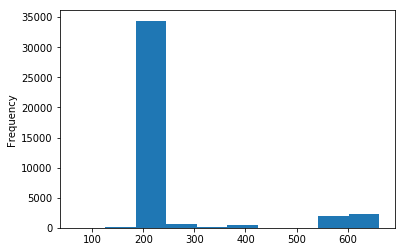

In [53]:
df.groupby(['Crawl Date', 'Keyword']).size().plot.hist()

### keyword length

In [54]:
df_keyword_len = pd.DataFrame(df['Keyword'].unique())[0].apply(lambda x: len(x))
df_keyword_len[:4]

0    16
1    20
2     9
3    16
Name: 0, dtype: int64

In [55]:
df_keyword_len.mean()

20.924031007751939

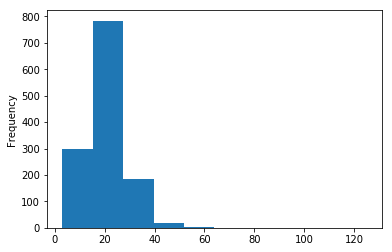

In [56]:
df_keyword_len.plot.hist()

### URL

In [57]:
df['URL'].nunique()

273710

a lot of different ones

    9 * 10**6 / 250,000 = 36
    
* 36 rows per url or
* every 36 rows the url changes

### URL length

In [58]:
df_url_len = pd.DataFrame(df['URL'].unique())[0].apply(lambda x: len(x))
df_url_len[:4]

0    50
1    18
2    84
3    38
Name: 0, dtype: int64

In [59]:
df_url_len.mean()

132.12167988016515

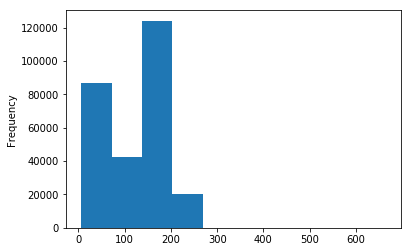

In [60]:
df_url_len.plot.hist()

### Market

In [61]:
df['Market'].nunique()

3

In [62]:
df[first_days].groupby(['Crawl Date', 'Market']).size()

Crawl Date  Market
2017-07-01  CA-en      28819
            GB-en     141972
            US-en     148743
2017-07-02  CA-en      28811
            GB-en     141922
            US-en     148693
2017-07-03  CA-en      28823
            GB-en     142047
            US-en     148582
2017-07-04  CA-en      28799
            GB-en     142013
            US-en     148583
dtype: int64

data for CA-en market is 1/5 of the other markets

and that is consistent over 31 days

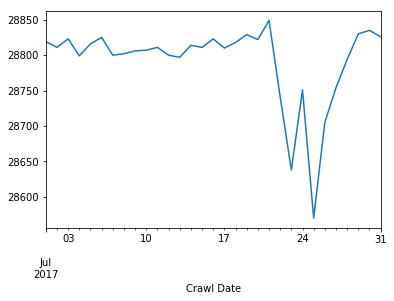

In [63]:
df.query('Market == "CA-en"').groupby(['Crawl Date']).size().plot()